<a href="https://colab.research.google.com/github/Kaustubh-Deotighare01/AN-Magicks-Recording-Portal/blob/main/DAA_PR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx matplotlib


Graph Algorithm Visualizer
1. Minimum Spanning Tree
2. Topological Sorting
Choose graph type (directed/undirected): undirected
Enter edge information (start end weight). Type 'done' when finished adding edges.
Enter edge (start end weight) or 'done' to finish: A B 4.5
Enter coordinates for A (x y): 1 2
Enter coordinates for B (x y): 2 3
Enter edge (start end weight) or 'done' to finish: A C 2.0
Enter coordinates for C (x y): 3 1
Enter edge (start end weight) or 'done' to finish: B C 1.5
Enter edge (start end weight) or 'done' to finish: done
Select an option (1 or 2): 1
Minimum Spanning Tree edges:
[('A', 'C', {'weight': 2.0}), ('B', 'C', {'weight': 1.5})]


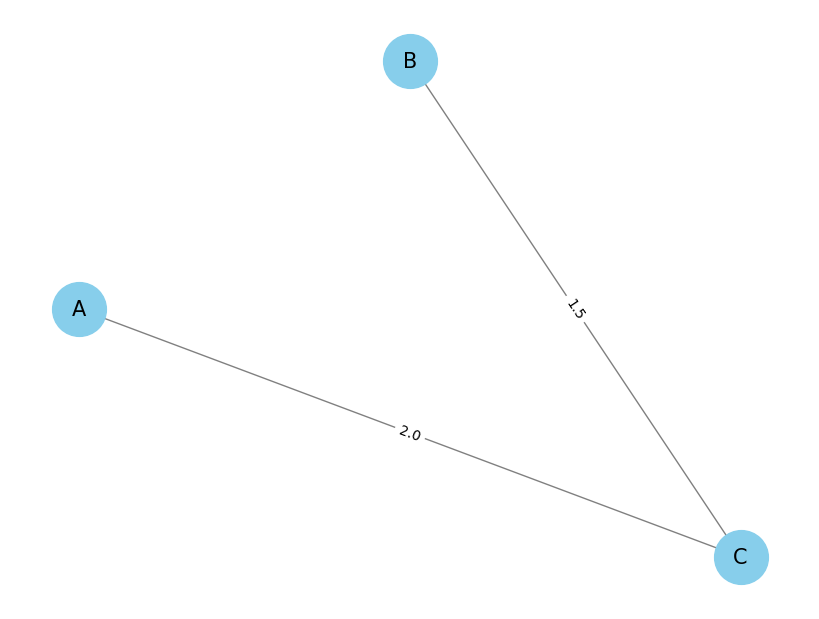

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(G, pos):
    plt.figure(figsize=(8, 6))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

def get_user_graph():
    graph_type = input("Choose graph type (directed/undirected): ").strip().lower()
    if graph_type == 'directed':
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    print("Enter edge information (start end weight). Type 'done' when finished adding edges.")
    pos = {}  # Position dictionary for node placement in visualization
    while True:
        edge_input = input("Enter edge (start end weight) or 'done' to finish: ")
        if edge_input.lower() == 'done':
            break
        start, end, weight = edge_input.split()
        weight = float(weight)

        # Add nodes and edge
        G.add_edge(start, end, weight=weight)

        # Get coordinates for nodes if they don't exist
        if start not in pos:
            x, y = map(float, input(f"Enter coordinates for {start} (x y): ").split())
            pos[start] = (x, y)
        if end not in pos:
            x, y = map(float, input(f"Enter coordinates for {end} (x y): ").split())
            pos[end] = (x, y)

    return G, pos

def minimum_spanning_tree(G):
    if not G.is_directed():
        mst = nx.minimum_spanning_tree(G, algorithm="prim")
        return mst
    else:
        print("Minimum Spanning Tree is not applicable for directed graphs.")
        return None

def topological_sort(G):
    if nx.is_directed_acyclic_graph(G):
        return list(nx.topological_sort(G))
    else:
        print("Graph is not a Directed Acyclic Graph (DAG), cannot perform topological sort.")
        return None

def main():
    print("Graph Algorithm Visualizer")
    print("1. Minimum Spanning Tree")
    print("2. Topological Sorting")

    G, pos = get_user_graph()

    choice = input("Select an option (1 or 2): ")

    if choice == '1':
        mst = minimum_spanning_tree(G)
        if mst:
            print("Minimum Spanning Tree edges:")
            print(mst.edges(data=True))
            plot_graph(mst, pos)

    elif choice == '2':
        order = topological_sort(G)
        if order:
            print("Topological Sort Order:", order)
            plot_graph(G, pos)
    else:
        print("Invalid choice.")

if __name__ == "__main__":
    main()
